# Reflecting Cosmic Ray analysis
This notebook analyzes pairs of tracks from simulated cosmic ray events, comparing upstream and downstream properties to extract the momentum resolution and shift due to material effects.
It uses root, uproot, and standard python numerical and plotting packages.

In [74]:
import os
import uproot 
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#import tensorflow as tf
from pathlib import Path
#from skspatial.objects import Vector
print("Hello world")

Hello world


This notebook processes TrkAna files constructed using the SelectReflections_module filter.
The TrkAna files contain 4 trees, one for each particle type reconstruction assumption: e+, e-, mu+, and mu-.
Each tree has the same structure, consisting of 2 tracks reconstructed from this particle: trk[0] is the upstream-going fit, trk[1] is the downstream-going fit.

In [134]:
input_dataset = np.empty
temp = np.empty
signal = np.empty
backgnd = np.empty
#files = ["/global/cfs/cdirs/m3712/Mu2e/TARef_v7.root:TAReM/trkana"]
files = ["/Users/brownd/data/14356147/nts.brownd.TAReflect.TARef.001202_00004963.root:TAReM/trkana",
         "/Users/brownd/data/14356147/nts.brownd.TAReflect.TARef.001202_00015026.root:TAReM/trkana",
        "/Users/brownd/data/14356147/nts.brownd.TAReflect.TARef.001202_00005432.root:TAReM/trkana",
        "/Users/brownd/data/14356147/nts.brownd.TAReflect.TARef.001202_00000000.root:TAReM/trkana",
        "/Users/brownd/data/14356147/nts.brownd.TAReflect.TARef.001202_00000010.root:TAReM/trkana",
        "/Users/brownd/data/14356147/nts.brownd.TAReflect.TARef.001202_00000085.root:TAReM/trkana",
        "/Users/brownd/data/14356147/nts.brownd.TAReflect.TARef.001202_00010872.root:TAReM/trkana",
        "/Users/brownd/data/14356147/nts.brownd.TAReflect.TARef.001202_00000053.root:TAReM/trkana",
        "/Users/brownd/data/14356147/nts.brownd.TAReflect.TARef.001202_00000024.root:TAReM/trkana",
        "/Users/brownd/data/14356147/nts.brownd.TAReflect.TARef.001202_00010057.root:TAReM/trkana"]

up_up_time = []
up_down_time = []
down_down_time = []
upmcpdg = []
downmcpdg = []
upmc_px = []
upmc_py = []
upmc_pz = []
up_px = []
up_py = []
up_pz = []
down_px = []
down_py = []
down_pz = []

up_posx = []
up_posy = []
down_posx = []
down_posy = []

nipa_up = []
nipa_down = []
nst_up = []
nst_down = []
for batch,rep in uproot.iterate(files,filter_name="/trk|trkfit|trkmcsim/i",report=True):
    print("Fields available in 'trkfit':", ak.fields(batch["trkfit"]))
    # upstream and downstream tracks
    upstream = batch["trkfit"][:,0]
    downstream = batch["trkfit"][:,1]
    print("uspstream ",len(upstream)," downstream ",len(downstream))
    uptrkmcsim = batch["trkmcsim"][:,0][:,0] # primary MC particle matched to the upstream track
    downtrkmcsim = batch["trkmcsim"][:,1][:,0] # primary MC particle matched to the downstream track
    # find the samples at the tracker entrance
    up_up = (upstream["sid"] == 0) & (upstream['mom']['fCoordinates']['fZ'] < 0) # exiting the tracker
    up_down = (upstream["sid"] == 0) & (upstream['mom']['fCoordinates']['fZ'] > 0) # re-entering the tracker
    down_down = (downstream["sid"] == 0) & (downstream['mom']['fCoordinates']['fZ'] > 0) # entering the tracker
    has_up_up = ak.sum(up_up,axis=1) > 0
    has_up_down = ak.sum(up_down,axis=1) > 0
    has_down_down = ak.sum(down_down,axis=1) > 0
    has_all = has_up_up & has_up_down & has_down_down
    up_up = up_up[has_all]
    up_down = up_down[has_all]
    down_down = down_down[has_all]
 #   print("has_all ",len(has_up_up),len(has_up_down),len(has_down_down),len(has_all))
#    #print("has_all ",ak.num(has_up_up,axis=1),ak.num(has_up_down,axis=1),ak.num(has_down_down,axis=1),ak.num(has_all,axis=1))
#    print("nums axis=0", ak.num(up_up, axis=0), ak.num(up_down, axis=0), ak.num(down_down, axis=0))
#    print("nums axis=1", ak.num(up_up, axis=1), ak.num(up_down, axis=1), ak.num(down_down, axis=1))
#    print("masked", ak.num(upstream[has_all], axis=0), ak.num(upstream[has_all], axis=1))
    up_up_time.extend(ak.flatten(upstream[has_all][up_up]['time']))                      
    up_down_time.extend(ak.flatten(upstream[has_all][up_down]['time']))
    down_down_time.extend(ak.flatten(downstream[has_all][down_down]['time']))
    uptrkmcsim = uptrkmcsim[has_all]
    downtrkmcsim = downtrkmcsim[has_all]
    upmcpdg.extend(uptrkmcsim['pdg'])
    downmcpdg.extend(downtrkmcsim['pdg'])
    
    up_px.extend(ak.flatten(upstream[has_all][up_down]['mom']['fCoordinates']['fX']))
    up_py.extend(ak.flatten(upstream[has_all][up_down]['mom']['fCoordinates']['fY']))
    up_pz.extend(ak.flatten(upstream[has_all][up_down]['mom']['fCoordinates']['fZ']))
    down_px.extend(ak.flatten(downstream[has_all][down_down]['mom']['fCoordinates']['fX']))
    down_py.extend(ak.flatten(downstream[has_all][down_down]['mom']['fCoordinates']['fY']))
    down_pz.extend(ak.flatten(downstream[has_all][down_down]['mom']['fCoordinates']['fZ']))

    up_posx.extend(ak.flatten(upstream[has_all][up_down]['pos']['fCoordinates']['fX']))
    up_posy.extend(ak.flatten(upstream[has_all][up_down]['pos']['fCoordinates']['fY']))
    down_posx.extend(ak.flatten(downstream[has_all][down_down]['pos']['fCoordinates']['fX']))
    down_posy.extend(ak.flatten(downstream[has_all][down_down]['pos']['fCoordinates']['fY']))
    
    nipaup = batch["trk.nipaup"][:,0] # only need upstream track for material intersection counting
    nipadown = batch["trk.nipadown"][:,0]
    nstup = batch["trk.nstup"][:,0]
    nstdown = batch["trk.nstdown"][:,0]
    nipaup = nipaup[has_all]
    nipadown = nipadown[has_all]
    nstup = nstup[has_all]
    nstdown = nstdown[has_all]
    
    nipa_up.extend(nipaup)
    nipa_down.extend(nipadown)
    nst_up.extend(nstup)    
    nst_down.extend(nstdown)
    

deltapdg = np.subtract(upmcpdg,downmcpdg)
decay = []
for dpdg in deltapdg :
    decay.append(dpdg != 0)
decay = np.array(decay)

up_mom2 = np.square(up_px) + np.square(up_py) + np.square(up_pz)
up_mom = np.sqrt(up_mom2)
down_mom2 = np.square(down_px) + np.square(down_py) + np.square(down_pz)
down_mom = np.sqrt(down_mom2)

up_posx = np.array(up_posx)
up_posy = np.array(up_posy)
down_posx = np.array(down_posx)
down_posy = np.array(down_posy)

nipa = np.add(nipa_up,nipa_down)
nst = np.add(nst_up,nst_down)
nmat = np.add(nipa,nst)

print("Upstream momentum ",len(up_mom),up_mom[:10])
print("Downstream momentum ",len(down_mom),down_mom[:10])
print("Upstream fit upstream time ",len(up_up_time),up_up_time[:10])
print("Upstream fit downstream time",len(up_down_time),up_down_time[:10])
print("Downstream fit downstream time",len(down_down_time),down_down_time[:10])
print("Upstream MC PDG code",len(upmcpdg),upmcpdg[:10])
print("Downstream MC PDG code",len(downmcpdg),downmcpdg[:10])
print("Decays ",decay.sum())
print("nmat ",len(nmat))
print("N ST ",nst[:10]," N IPA ",nipa[:10], "N mat ", nmat[:10])


Fields available in 'trkfit': ['mom', 'pos', 'time', 'dmom', 'momerr', 'inbounds', 'gap', 'early', 'late', 'sid', 'sindex']
uspstream  2978  downstream  2978
Fields available in 'trkfit': ['mom', 'pos', 'time', 'dmom', 'momerr', 'inbounds', 'gap', 'early', 'late', 'sid', 'sindex']
uspstream  1183  downstream  1183
Fields available in 'trkfit': ['mom', 'pos', 'time', 'dmom', 'momerr', 'inbounds', 'gap', 'early', 'late', 'sid', 'sindex']
uspstream  2963  downstream  2963
Fields available in 'trkfit': ['mom', 'pos', 'time', 'dmom', 'momerr', 'inbounds', 'gap', 'early', 'late', 'sid', 'sindex']
uspstream  897  downstream  897
Fields available in 'trkfit': ['mom', 'pos', 'time', 'dmom', 'momerr', 'inbounds', 'gap', 'early', 'late', 'sid', 'sindex']
uspstream  2983  downstream  2983
Fields available in 'trkfit': ['mom', 'pos', 'time', 'dmom', 'momerr', 'inbounds', 'gap', 'early', 'late', 'sid', 'sindex']
uspstream  1268  downstream  1268
Fields available in 'trkfit': ['mom', 'pos', 'time', '

Label true elec

In [135]:
true_em = []
true_mum = []
for mcpdg in upmcpdg :
    true_em.append(mcpdg == 11)
    true_mum.append(mcpdg == 13)
true_em = np.array(true_em)
true_mum = np.array(true_mum)
print("True Electrons",len(true_em),true_em[:10])
print("True Muons",len(true_mum),true_mum[:10])


True Electrons 39042 [ True  True  True  True  True  True  True  True  True  True]
True Muons 39042 [False False False False False False False False False False]


N true electrons  33593  N true muons  5430


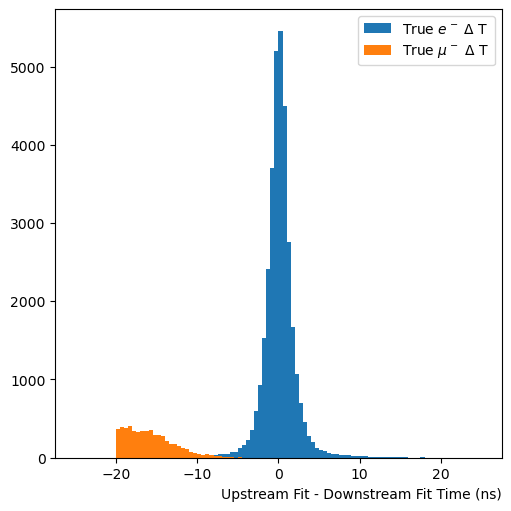

In [136]:
time_diff = np.subtract(up_down_time,down_down_time)
em_time_diff = time_diff[true_em]
mum_time_diff = time_diff[true_mum]
print("N true electrons ",len(em_time_diff), " N true muons ", len(mum_time_diff))
fig, ax = plt.subplots(layout='constrained', figsize=(5, 5))
ehist = ax.hist(em_time_diff,label="True $e^-$ $\Delta$ T", bins=100,range=(-25,25))
muhist = ax.hist(mum_time_diff,label="True $\mu^-$ $\Delta$ T", bins=100,range=(-25,25))
ax.set_xlabel('Upstream Fit - Downstream Fit Time (ns)',loc='right')
ax.legend()

In [137]:
abs_time_diff = np.absolute(time_diff)
good_em = []
max_tdiff = 5.0
for tdiff in abs_time_diff :
    good_em.append( tdiff <  max_tdiff)
print("Good electron ",len(good_em),good_em[:10])
good_em = np.array(good_em)
true_good_em = good_em[true_em]
eff = good_em.sum()/true_em.sum()
pur = true_good_em.sum()/good_em.sum()
print("For Delta T < ", max_tdiff , " efficiency = ",eff," purity = ",pur)

Good electron  39042 [True, False, True, True, True, True, True, True, True, True]
For Delta T <  5.0  efficiency =  0.9665704164558092  purity =  0.9994148444718202


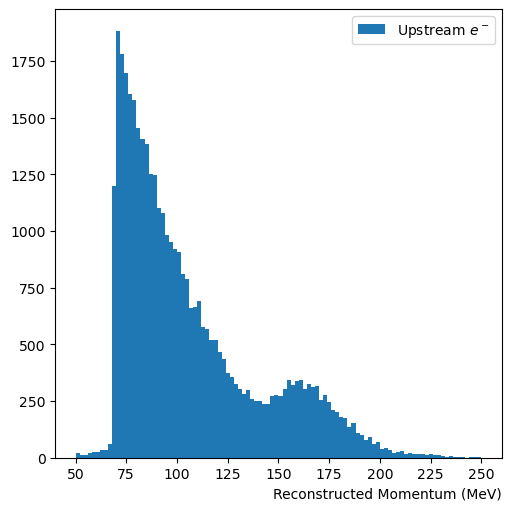

In [138]:
fig, ax = plt.subplots(layout='constrained', figsize=(5, 5))
uphist = ax.hist(up_mom,label="Upstream $e^-$", bins=100,range=(50,250))
ax.set_xlabel('Reconstructed Momentum (MeV)',loc='right')
ax.legend()

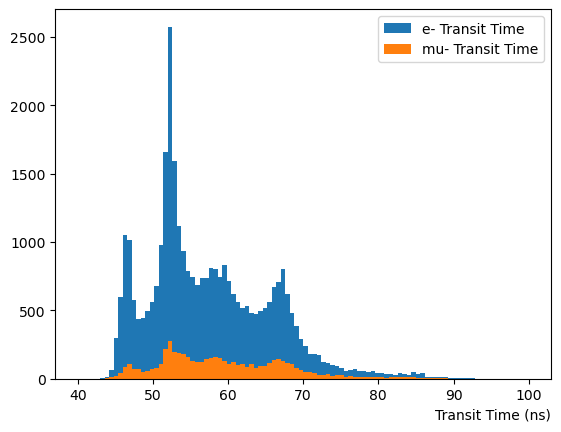

In [139]:
transit_time = np.subtract(up_down_time,up_up_time)
em_transit_time = transit_time[true_em]
mum_transit_time = transit_time[true_mum]
plt.hist(em_transit_time,label="e- Transit Time", bins=100,range=(40,100))
plt.hist(mum_transit_time,label="mu- Transit Time", bins=100,range=(40,100))
plt.xlabel('Transit Time (ns)', loc='right')
plt.legend()

highp  620
nomat  39042


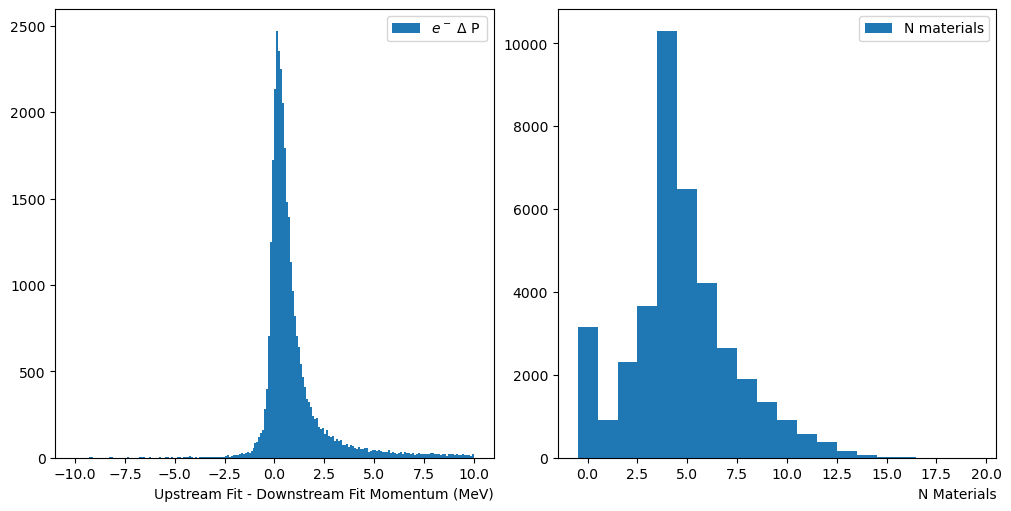

In [140]:
mom_diff = np.subtract(up_mom,down_mom)
nomat = []
for nm in nmat :
    nomat.append( nm <4 )
print("highp ",len(highp))
print("nomat ",len(nomat))
good_em_nomat = np.logical_and(nomat,good_em)

em_mom_diff = mom_diff[good_em]
em_mom_diff_nomat = mom_diff[good_em_nomat]
nmat_good = nmat[good_em]
up_mom_good = up_mom[good_em]

fig, (ax0, ax1 )  = plt.subplots(1,2,layout='constrained', figsize=(10,5))
ax0.hist(em_mom_diff,label="$e^-$ $\Delta$ P",bins=200,range=(-10,10))
ax0.set_xlabel("Upstream Fit - Downstream Fit Momentum (MeV)",loc='right')
ax0.legend()
ax1.hist(nmat,label="N materials",bins=20,range=(-0.5,19.5))
ax1.set_xlabel("N Materials",loc='right')
ax1.legend()


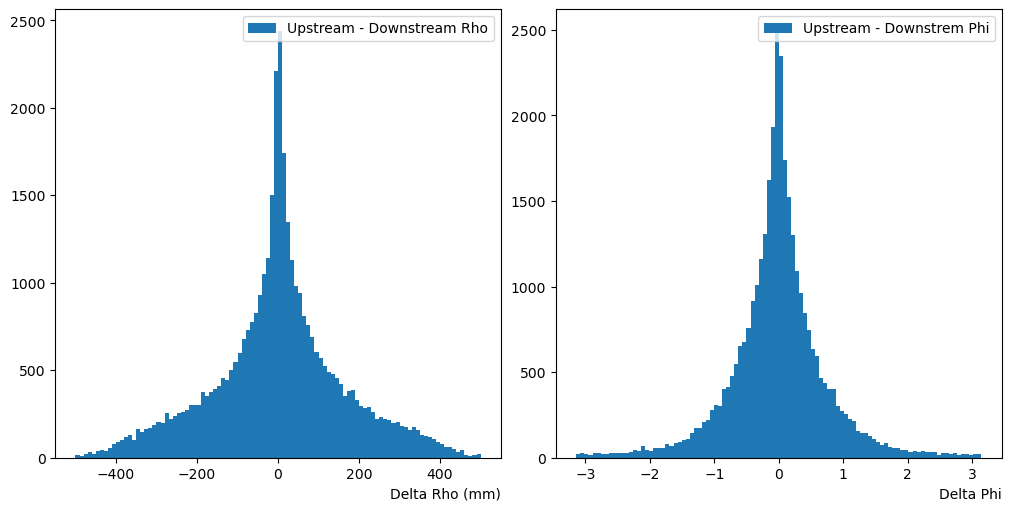

In [141]:
up_rho2 = np.square(up_posx) + np.square(up_posy)
up_rho = np.sqrt(up_rho2);
down_rho2 = np.square(down_posx) + np.square(down_posy)
down_rho = np.sqrt(down_rho2)
drho = up_rho - down_rho

up_phi = np.arctan2(up_posy, up_posx)
down_phi = np.arctan2(down_posy, down_posx)
dphi = up_phi - down_phi

fig, (ax0, ax1 )  = plt.subplots(1,2,layout='constrained', figsize=(10,5))
drho = ax0.hist(drho,label="Upstream - Downstream Rho", bins=100,range=(-500,500))
ax0.set_xlabel("Delta Rho (mm)",loc='right')
ax0.legend()
dphi = ax1.hist(dphi,label="Upstream - Downstrem Phi",bins=100,range=(-3.14,3.14))
ax1.set_xlabel("Delta Phi",loc='right')
ax1.legend()